In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [45]:
data = load_iris()
X = data.data
y = data.target

In [46]:
class PCA:
    def __init__(self, n_features):
        self.n_features = n_features
        self.components = None
        self.explained_variance = None
        self.mean = None

    def fit(self, X):
        # 1. centering the data
        self.mean = X.mean(axis = 0)
        X_centered = X - self.mean

        # 2. covariance matrix
        n = X.shape[0]
        covar = (X_centered.T @ X_centered) / (n - 1)

        # 3. Eigen Decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(covar)

        # 4. Sort eigenvalues and eigenvectors
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # 5. Keep only the top `n_features`
        self.components = eigenvectors[:, :self.n_features]
        self.explained_variance = eigenvalues[:self.n_features]

        
    def transform(self, X):
        X_centered = X - self.mean
        return X_centered @ self.components


## Model execution

In [47]:
model = PCA(2)
model.fit(X)
X_pca = model.transform(X)

## 2D principal components plot

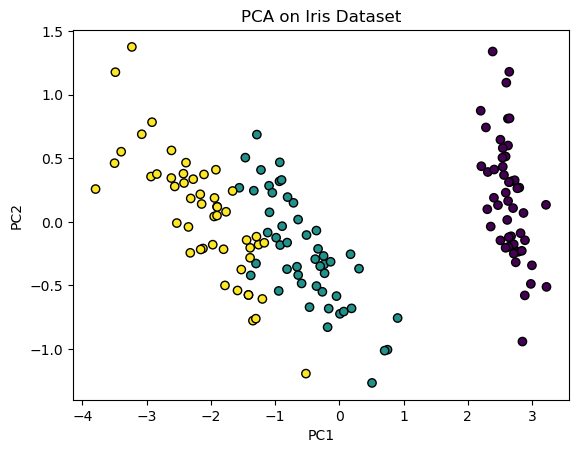

In [48]:
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.show()


## Data Info retained after compression

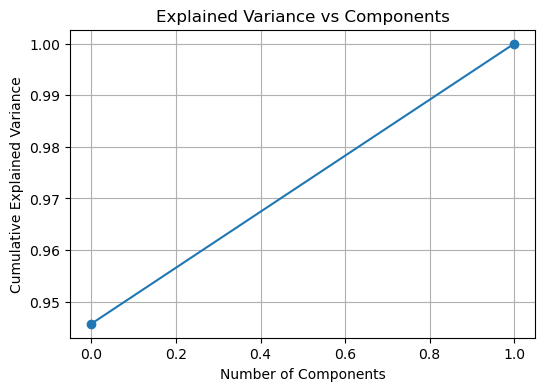

In [49]:
ratio = model.explained_variance / np.sum(model.explained_variance)
plt.figure(figsize=(6,4))
plt.plot( np.cumsum(ratio), marker="o" ) 
plt.xlabel("Number of Components") 
plt.ylabel("Cumulative Explained Variance") 
plt.title("Explained Variance vs Components") 
plt.grid(True) 
plt.show()